
# DAEL

## Algorithm 



### Gene relevancy


#### Association Score from Open Targets Platform

The baseline of the proposed method is based on the assessment of the biological association between the assessed genes and the analyzed organ associated with the studied disease. This purpose is directly supported by Open Targets Platform [1] as it provides a scored ranking (DA score) which associates genes with a diseases associated with a certain organ, or a specific disease, using biological evidences from all integrated sources. This score is computed as the harmonic sum of the scores associated with each data type, which in turn are computed as the harmonic sum of the scores of each data source. The calculation of each evidence score is performed taking into account the evidence frequency, the strength of the effect described by it and its confidence [2]. DA score is requested using this platform's Application Programming Interface (API), retrieving the related genes with a certain organ or specific disease. This result is compared with available candidate genes for each assessed problem, so that the scores for those common genes initially identified are exclusively kept. This value can be ranging from 0 to 1, where 1 means strong relation between the gene and the diseases, while 0 means no relation. 


#### LOD

LOD score, also known as B-statistic, is a statistical parameter which indicates the probability that a gene is differentially expressed when comparing two states by means of the logarithm of the ratio [3]. It is a useful tool for detecting genes that are differentially expressed for a disease. LOD score is obtained by limma package [4] for each pair of states (E.g. health and tumor). In multiclass scenarios, LOD score is calculated for each possible pair of states. Therefore, the mean of all of these pairs has to be calculated in order to obtain a single score of each gene. Since this score is represented in a logarithmic scale, it can take any real value, so it is normalized in the same range as the DA score (between 0 and 1). 

#### Calculation
This paper proposes to compute gene relevancy taking into account both LOD and DA scores. Given a gene $g_j$, and a set of cancer states $D$ (in binary problems it refers to healthy and tumor, and for multiclass it refers to all the considered pathological states, and the respective string of the organ affected $'D'$ (E.g 'lung' when dealing with lung cancer, or 'brain' when dealing with brain cancer), gene relevancy is defined according to the following equation:


\begin{equation}
Rel(g_j,D,'D') = DA(g_j,'D') \times LOD(g_j,D)
\end{equation}
 \noindent where $DA(g_j,'D')$ denotes the DA score of $g_j$ with regard to $'D'$, and $LOD(g_j,D)$ denotes the LOD score of $g_j$ in relation to the set of pathological states $D$.


### Gene redundancy

Redundancy is a highly important factor that is taken into account both in traditional FS algorithms [5,6] and in recently proposed algorithms [7,8]. The goal when incorporating redundancy concept is to avoid selecting genes that, even though being closely related to the studied disease, do not provide new information regarding the already selected set of genes.

Applied to our method, redundancy is calculated based on the biological evidences that associate a gene with a certain organ set of diseases, which are obtained by web queries to Open Targets Platform, already mentioned, through KnowSeq package. Specifically, the redundancy of the $g_j$ gene over the $g_i$ gene in relation with the $'D'$ organ is defined as the proportion of the DA score of $g_j$ that is explained through $g_i$, understanding it as the proportion of the $g_j$ evidences that can be found in the $g_i$ evidences, either partially or completely. This metric can be computed following Equation \ref{eq:red}.


\begin{equation} \label{eq:red}
Red(g_j,g_i,'D') = \frac{|E_{g_j,'D'} \cap E_{g_i,'D'}|}{|E_{g_j,'D'}|} \times DA(g_j,'D')
\end{equation}

Where $E_{g_i,'D'}$ denotes the set of evidences that links $g_i$ with the organ $'D'$, and $|E_{g_i,'D'}|$ is the size of this set. Thus, $ 0 \leq Red(g_j,g_i,'D') \leq DA(g_j,'D') \leq 1$. A redundancy of 0 means that there is no evidences that link $g$ and $'D'$ which also links $g_i$ and $'D'$, so both DA scores are independent. Conversely a redundancy equal to $DA(g_j,'D')$ indicates that all found evidences of $g_j$ in relation to $'D'$, also relates $g_i$ to $'D'$, this is, that $g$ DA score can be fully explained through $g_i$.


### DAEL

This paper proposes Disease Association Evidence-based and LODs (DAEL), an iterative algorithm based on the principle of minimum redundancy maximum relevance [6] in biological terms and whose functional diagram can be seen in the following figure. 

![**DA-RED-LODs diagram.** Overall flowchart of the proposed DAEL method describing the main experimental steps followed for its implementation: 1) Initial DEGs candidates, 2) Retrieval of scores, 3) Iterative selection of highlighted DEGs, and 4) Determination of DAEL-based gene signature.](imgs/daredfs.png)



Initially, proposed algorithm starts with an empty set of selected genes ($S_G = \emptyset$), a set of possible genes ($G$), a set of cancer states ($D$), and the organ affected $'D'$ (‘lung’, ‘brain’, etc.). As a first step in the DEGs selection process, the gene with the highest relevancy is selected, becoming the first gene added to $S_G$. Subsequently, gene scores are calculated which enables to select that gene with maximum relevancy and minimum redundancy in each iterative step to be included in $S_G$. The operation of the DAEL algorithm in every step, select the gene $g_j$ that maximizes the following score for each candidate gene, according the following equation:

\begin{equation} \label{eq:dael}
\begin{split} 
S_{DAEL}(g_j,D,'D',S_G) = Rel(g_j,D,'D') - \sum_{g_i \in S_G} \frac{Red(g_j,g_i,'D')}{|S_G|}
\end{split}
\end{equation}

where $S(g_j,D,'D',S_G)$ is the score assigned to the gene $g_j$ in relation to the set of currently selected gene set $S_G$ and the cancer states $D$; $Rel(g_j,D,'D')$ and $Red(g_j,g_i,'D')$ are the relevancy and redundancy calculated according relevancy and redundancy equations, respectively; $|S_G|$ notes the size of the set of already selected genes $S_G$.

Along this research, in order to assess the operation and strenght of the different terms in the DAEL algorithm equation, two more basic versions of the proposed algorithm have also been studied. Firstly, Disease Association (DA) FS, is based on sorting genes by a reduced version of the relevance of a gene, calculated exclusively using the DA score, according to the following equation: 

\begin{equation} \label{eq:da}
S_{DA}(g_j,D,'D',S_G) =  DA(g_j,'D') 
\end{equation}

Secondly, Disease Association Evidence-based (DAE) FS, involves adding the redundancy calculation to the DA algorithm. This implementation leads to a FS method following equation: 

\begin{equation} \label{eq:dae}
\begin{split}
S_{DAE}(g_j,D,'D',S_G) = DA(g_j,'D') - \sum_{g_i \in S_G} \frac{Red(g_j,g_i,'D')}{|S_G|}
\end{split}
\end{equation}


## Usage

To show how the DA-RED-LOD feature selector works, an example of use will be computed using two possible types of cancer multiclass data. For this example, kidney or lung cancer can be selected by setting the following variable.

In [1]:
cancer.type <- 'lung'

In [2]:
data.train <- read.table(paste('data/',cancer.type,'/expression-train-multiclass.csv',sep=''),sep='\t')
labels.train <- read.table(paste('data/',cancer.type,'/labels-train-multiclass.csv',sep=''),sep='\t')$x

In [14]:
source('aux/DEGsEvidences.R')
source('aux/DEGsExtraction.R')
source('featureSelection.R')

The function create for computing the feaute selection process receives an expression matrix with the samples in the rows and the genes in the columns, the samples labels and the disease the user wants to study. *Mode* parameter indicates which FS method is used, options are: da, daRed or daLOD. The user can also select the number of genes to extract using the parameter *maxGenes*. Finally, *returnEvidences* is a boolean parameter which indicates if found evidences of selected genes are returned or not.

In this example, 20 genes are going to be selected in relation with selected *cancer.type* diseases by using the three possible methods, and found evidences are going to be returned. 

In [15]:
featureRankingDA <- daFeatureSelection(data.train,labels.train,disease=cancer.type,mode='da',maxGenes=10,returnEvidences=TRUE)

Calculating ranking of biological relevant genes by using DA implementation...
Disease Association ranking: GABRA3 ROS1 ZBTB16 HOXC11 SFTPD SCN7A HMGA2 MMP3 ABCA3 SFTPC
Obtaining related diseases with the DEGs from targetValidation platform...
Evidences acquired successfully!


In [16]:
featureRankingDARED <- daFeatureSelection(data.train,labels.train,disease=cancer.type,mode='daRed',maxGenes=10,returnEvidences=TRUE)

Calculating ranking of biological relevant genes by using DA-Red implementation...
Disease Association ranking: GABRA3 ROS1 ZBTB16 HOXC11 SFTPD SCN7A HMGA2 MMP3 ABCA3 SFTPC
Obtaining related diseases with the DEGs from targetValidation platform...
Evidences acquired successfully!
Calculating genes scores...


In [17]:
featureRankingDALOD <- daFeatureSelection(data.train,labels.train,disease=cancer.type,mode='daLOD',maxGenes=10,returnEvidences=TRUE)

Disease Association ranking: GABRA3 ROS1 ZBTB16 HOXC11 SFTPD SCN7A HMGA2 MMP3 ABCA3 SFTPC
Obtaining related diseases with the DEGs from targetValidation platform...
Evidences acquired successfully!
Calculating genes LOD scores...
More than two classes detected, applying limma multiclass
Contrasts: adeno-scc
 Contrasts: adeno-STN
 Contrasts: scc-STN
Calculating genes scores...


## Ranking

Below it is shown the ranking of selected genes and computed scores by each FS mode: DA, DA-RED and DA-RED-LOD

In [18]:
data.frame(featureRankingDA$ranking)

,featureRankingDA.ranking
,<dbl>
GABRA3,1
ROS1,1
ZBTB16,1
HOXC11,1
SFTPD,1
SCN7A,1
HMGA2,1
MMP3,1
ABCA3,1


In [19]:
data.frame(unlist(featureRankingDARED$ranking))

,unlist.featureRankingDARED.ranking.
,<dbl>
GABRA3.GABRA3,1.0000000
APOBEC3B,1.0000000
ROS1,0.9974288
SFTPD,0.9914999
ABCA3,0.9756173
MMP3,0.9579924
SFTPC,0.9438624
HMGA2,0.9253430
MMP12,0.8514005


In [20]:
data.frame(unlist(featureRankingDALOD$ranking))

,unlist.featureRankingDALOD.ranking.
,<dbl>
TFAP2A,0.6088907
CHRNB4,0.4262641
MMP12,0.4319469
ABCA3,0.3580067
E2F7,0.3505701
APOBEC3B,0.3148541
CDC45,0.2930691
GABRA3,0.2569585
SFTPC,0.2590628


## Interpretability

Let's check found evidences for the first selected gene by each FS

In [21]:
names(featureRankingDA$evidences)[1]
featureRankingDA$evidences[[1]]

[1] "GABRA3"

$known_drug
$known_drug[[1]]
$known_drug[[1]]$score
[1] 1

$known_drug[[1]]$evidence
$known_drug[[1]]$evidence$`Drug Name`
[1] "MIDAZOLAM"

$known_drug[[1]]$evidence$`Molecule Type`
[1] "Small molecule"


$known_drug[[1]]$codes
[1] "curator inference"


$known_drug[[2]]
$known_drug[[2]]$score
[1] 1

$known_drug[[2]]$evidence
$known_drug[[2]]$evidence$`Drug Name`
[1] "PROPOFOL"

$known_drug[[2]]$evidence$`Molecule Type`
[1] "Small molecule"


$known_drug[[2]]$codes
[1] "curator inference"


$known_drug[[3]]
$known_drug[[3]]$score
[1] 0.2

$known_drug[[3]]$evidence
$known_drug[[3]]$evidence$`Drug Name`
[1] "SEVOFLURANE"

$known_drug[[3]]$evidence$`Molecule Type`
[1] "Small molecule"


$known_drug[[3]]$codes
[1] "curator inference"



$affected_pathway
$affected_pathway[[1]]
$affected_pathway[[1]]$score
[1] 0.8300163

$affected_pathway[[1]]$evidence
$affected_pathway[[1]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/28179366"

$affected_pathway[[1]]$evidence$Name
[1] "*"

$affected_pathway[[1]]$evidence$`Reactome Url`
[1] "http://www.reactome.org/PathwayBrowser/#R-HSA-5696395"


$affected_pathway[[1]]$codes
[1] "computational combinatorial evidence"


$affected_pathway[[2]]
$affected_pathway[[2]]$score
[1] 0.657224

$affected_pathway[[2]]$evidence
$affected_pathway[[2]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/28179366"

$affected_pathway[[2]]$evidence$Name
[1] "*"

$affected_pathway[[2]]$evidence$`Reactome Url`
[1] "http://www.reactome.org/PathwayBrowser/#R-HSA-354192"


$affected_pathway[[2]]$codes
[1] "computational combinatorial evidence"



$rna_expression
$rna_expression[[1]]
$rna_expression[[1]]$score
[1] 0.5346

$rna_expression[[1]]$evidence
$rna_expression[[1]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/27699219"

$rna_expression[[1]]$evidence$Comparison
[1] "'tumor tissue' vs 'non-malignant tissue'"


$rna_expression[[1]]$codes
[1] "RNA-seq evidence"


$rna_expression[[2]]
$rna_expression[[2]]$score
[1] 0.5049

$rna_expression[[2]]$evidence
$rna_expression[[2]]$evidence$Url
[1] "*"

$rna_expression[[2]]$evidence$Comparison
[1] "'non small cell lung carcinoma neoplasm' vs 'normal tissue adjacent to neoplasm'"


$rna_expression[[2]]$codes
[1] "RNA-seq evidence"


$rna_expression[[3]]
$rna_expression[[3]]$score
[1] 0.1336339

$rna_expression[[3]]$evidence
$rna_expression[[3]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/20522636"

$rna_expression[[3]]$evidence$Comparison
[1] "'lung cancer' vs 'normal' in 'lung; Fresh-frozen tissue'"


$rna_expression[[3]]$codes
[1] "expression microarray evidence"



$literature
$literature[[1]]
$literature[[1]]$score
[1] 0.332

$literature[[1]]$evidence
$literature[[1]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/23617850"


$literature[[1]]$codes
[1] "Literature mining"


$literature[[2]]
$literature[[2]]$score
[1] 0.208

$literature[[2]]$evidence
$literature[[2]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/27081042"


$literature[[2]]$codes
[1] "Literature mining"


$literature[[3]]
$literature[[3]]$score
[1] 0.136

$literature[[3]]$evidence
$literature[[3]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/19048400"


$literature[[3]]$codes
[1] "Literature mining"


$literature[[4]]
$literature[[4]]$score
[1] 0.116

$literature[[4]]$evidence
$literature[[4]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/25089631"


$literature[[4]]$codes
[1] "Literature mining"

In [22]:
names(featureRankingDARED$evidences)[1]
featureRankingDARED$evidences[[1]]

[1] "GABRA3"

$known_drug
$known_drug[[1]]
$known_drug[[1]]$score
[1] 1

$known_drug[[1]]$evidence
$known_drug[[1]]$evidence$`Drug Name`
[1] "MIDAZOLAM"

$known_drug[[1]]$evidence$`Molecule Type`
[1] "Small molecule"


$known_drug[[1]]$codes
[1] "curator inference"


$known_drug[[2]]
$known_drug[[2]]$score
[1] 1

$known_drug[[2]]$evidence
$known_drug[[2]]$evidence$`Drug Name`
[1] "PROPOFOL"

$known_drug[[2]]$evidence$`Molecule Type`
[1] "Small molecule"


$known_drug[[2]]$codes
[1] "curator inference"


$known_drug[[3]]
$known_drug[[3]]$score
[1] 0.2

$known_drug[[3]]$evidence
$known_drug[[3]]$evidence$`Drug Name`
[1] "SEVOFLURANE"

$known_drug[[3]]$evidence$`Molecule Type`
[1] "Small molecule"


$known_drug[[3]]$codes
[1] "curator inference"



$affected_pathway
$affected_pathway[[1]]
$affected_pathway[[1]]$score
[1] 0.8300163

$affected_pathway[[1]]$evidence
$affected_pathway[[1]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/28179366"

$affected_pathway[[1]]$evidence$Name
[1] "*"

$affected_pathway[[1]]$evidence$`Reactome Url`
[1] "http://www.reactome.org/PathwayBrowser/#R-HSA-5696395"


$affected_pathway[[1]]$codes
[1] "computational combinatorial evidence"


$affected_pathway[[2]]
$affected_pathway[[2]]$score
[1] 0.657224

$affected_pathway[[2]]$evidence
$affected_pathway[[2]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/28179366"

$affected_pathway[[2]]$evidence$Name
[1] "*"

$affected_pathway[[2]]$evidence$`Reactome Url`
[1] "http://www.reactome.org/PathwayBrowser/#R-HSA-354192"


$affected_pathway[[2]]$codes
[1] "computational combinatorial evidence"



$rna_expression
$rna_expression[[1]]
$rna_expression[[1]]$score
[1] 0.5346

$rna_expression[[1]]$evidence
$rna_expression[[1]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/27699219"

$rna_expression[[1]]$evidence$Comparison
[1] "'tumor tissue' vs 'non-malignant tissue'"


$rna_expression[[1]]$codes
[1] "RNA-seq evidence"


$rna_expression[[2]]
$rna_expression[[2]]$score
[1] 0.5049

$rna_expression[[2]]$evidence
$rna_expression[[2]]$evidence$Url
[1] "*"

$rna_expression[[2]]$evidence$Comparison
[1] "'non small cell lung carcinoma neoplasm' vs 'normal tissue adjacent to neoplasm'"


$rna_expression[[2]]$codes
[1] "RNA-seq evidence"


$rna_expression[[3]]
$rna_expression[[3]]$score
[1] 0.1336339

$rna_expression[[3]]$evidence
$rna_expression[[3]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/20522636"

$rna_expression[[3]]$evidence$Comparison
[1] "'lung cancer' vs 'normal' in 'lung; Fresh-frozen tissue'"


$rna_expression[[3]]$codes
[1] "expression microarray evidence"



$literature
$literature[[1]]
$literature[[1]]$score
[1] 0.332

$literature[[1]]$evidence
$literature[[1]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/23617850"


$literature[[1]]$codes
[1] "Literature mining"


$literature[[2]]
$literature[[2]]$score
[1] 0.208

$literature[[2]]$evidence
$literature[[2]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/27081042"


$literature[[2]]$codes
[1] "Literature mining"


$literature[[3]]
$literature[[3]]$score
[1] 0.136

$literature[[3]]$evidence
$literature[[3]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/19048400"


$literature[[3]]$codes
[1] "Literature mining"


$literature[[4]]
$literature[[4]]$score
[1] 0.116

$literature[[4]]$evidence
$literature[[4]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/25089631"


$literature[[4]]$codes
[1] "Literature mining"

In [32]:
names(featureRankingDALOD$evidences)[1]
featureRankingDALOD$evidences[[1]]

[1] "TFAP2A"

$affected_pathway
$affected_pathway[[1]]
$affected_pathway[[1]]$score
[1] 1

$affected_pathway[[1]]$evidence
$affected_pathway[[1]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/28179366"

$affected_pathway[[1]]$evidence$Name
[1] "*"

$affected_pathway[[1]]$evidence$`Reactome Url`
[1] "http://www.reactome.org/PathwayBrowser/#R-HSA-3134975"


$affected_pathway[[1]]$codes
[1] "computational combinatorial evidence"


$affected_pathway[[2]]
$affected_pathway[[2]]$score
[1] 1

$affected_pathway[[2]]$evidence
$affected_pathway[[2]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/28179366"

$affected_pathway[[2]]$evidence$Name
[1] "*"

$affected_pathway[[2]]$evidence$`Reactome Url`
[1] "http://www.reactome.org/PathwayBrowser/#R-HSA-6802949"


$affected_pathway[[2]]$codes
[1] "computational combinatorial evidence"


$affected_pathway[[3]]
$affected_pathway[[3]]$score
[1] 0.7032246

$affected_pathway[[3]]$evidence
$affected_pathway[[3]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/28179366"

$affected_pathway[[3]]$evidence$Name
[1] "*"

$affected_pathway[[3]]$evidence$`Reactome Url`
[1] "http://www.reactome.org/PathwayBrowser/#R-HSA-202403"


$affected_pathway[[3]]$codes
[1] "computational combinatorial evidence"



$animal_model
$animal_model[[1]]
$animal_model[[1]]$score
[1] 0.9015

$animal_model[[1]]$evidence
$animal_model[[1]]$evidence$`Is Associated`
[1] FALSE

$animal_model[[1]]$evidence$Specie
[1] "mouse"


$animal_model[[1]]$codes
[1] "animal model system study evidence"



$rna_expression
$rna_expression[[1]]
$rna_expression[[1]]$score
[1] 0.4653

$rna_expression[[1]]$evidence
$rna_expression[[1]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/27699219"

$rna_expression[[1]]$evidence$Comparison
[1] "'tumor tissue' vs 'non-malignant tissue'"


$rna_expression[[1]]$codes
[1] "RNA-seq evidence"


$rna_expression[[2]]
$rna_expression[[2]]$score
[1] 0.4059

$rna_expression[[2]]$evidence
$rna_expression[[2]]$evidence$Url
[1] "*"

$rna_expression[[2]]$evidence$Comparison
[1] "'non small cell lung carcinoma neoplasm' vs 'normal tissue adjacent to neoplasm'"


$rna_expression[[2]]$codes
[1] "RNA-seq evidence"


$rna_expression[[3]]
$rna_expression[[3]]$score
[1] 0.3647411

$rna_expression[[3]]$evidence
$rna_expression[[3]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/20522636"

$rna_expression[[3]]$evidence$Comparison
[1] "'lung cancer' vs 'normal' in 'lung; Fresh-frozen tissue'"


$rna_expression[[3]]$codes
[1] "expression microarray evidence"


$rna_expression[[4]]
$rna_expression[[4]]$score
[1] 0.3564

$rna_expression[[4]]$evidence
$rna_expression[[4]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/20878980"

$rna_expression[[4]]$evidence$Comparison
[1] "'non-small cell lung cancer' vs 'normal'"


$rna_expression[[4]]$codes
[1] "expression microarray evidence"


$rna_expression[[5]]
$rna_expression[[5]]$score
[1] 0.3405418

$rna_expression[[5]]$evidence
$rna_expression[[5]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/20522636"

$rna_expression[[5]]$evidence$Comparison
[1] "'lung cancer' vs 'normal' in 'lung; Formalin-fixed paraffin-embedded tissue'"


$rna_expression[[5]]$codes
[1] "expression microarray evidence"


$rna_expression[[6]]
$rna_expression[[6]]$score
[1] 0.1764

$rna_expression[[6]]$evidence
$rna_expression[[6]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/20802022"

$rna_expression[[6]]$evidence$Comparison
[1] "'primary tumor' vs 'adjacent normal tissue'"


$rna_expression[[6]]$codes
[1] "expression microarray evidence"


$rna_expression[[7]]
$rna_expression[[7]]$score
[1] 0.04197638

$rna_expression[[7]]$evidence
$rna_expression[[7]]$evidence$Url
[1] "http://europepmc.org/abstract/MED/30177858"

$rna_expression[[7]]$evidence$Comparison
[1] "'neoplasm' vs 'normal tissue adjacent to neoplasm' in 'lung adenocarcinoma'"


$rna_expression[[7]]$codes
[1] "expression microarray evidence"


$rna_expression[[8]]
$rna_expression[[8]]$score
[1] 0.03404745

$rna_expression[[8]]$evi

## Classification

In [24]:
data.test <- t(read.table(paste('data/',cancer.type,'/expression-test-multiclass.csv',sep=''),sep='\t'))
labels.test <- read.table(paste('data/',cancer.type,'/labels-test-multiclass.csv',sep=''),sep='\t')$x

In [26]:
#da.cv.results <- knn_CV(data.train,labels.train,names(featureRankingDA$ranking))
test.results.da <- knn_test(data.train,labels.train,data.test,
                            labels.test,names(featureRankingDA$ranking))
                           #da.cv.results$bestK)

Tuning the optimal K...
Testing with 2 variables...
Testing with 3 variables...
Testing with 4 variables...
Testing with 5 variables...
Testing with 6 variables...
Testing with 7 variables...
Testing with 8 variables...
Testing with 9 variables...
Testing with 10 variables...
Classification done successfully!


In [27]:
#daRed.cv.results <- knn_CV(data.train,labels.train,names(featureRankingDARED$ranking))
test.results.daRed <- knn_test(data.train,labels.train,data.test,
                               labels.test,names(featureRankingDARED$ranking))
                              #daRed.cv.results$bestK)

Tuning the optimal K...
Testing with 2 variables...
Testing with 3 variables...
Testing with 4 variables...
Testing with 5 variables...
Testing with 6 variables...
Testing with 7 variables...
Testing with 8 variables...
Testing with 9 variables...
Testing with 10 variables...
Classification done successfully!


In [28]:
#daLOD.cv.results <- knn_CV(data.train,labels.train,names(featureRankingDALOD$ranking))
test.results.daLOD <- knn_test(data.train,labels.train,data.test,
                              labels.test,names(featureRankingDALOD$ranking))
                             #daLOD.cv.results$bestK)

Tuning the optimal K...
Testing with 2 variables...
Testing with 3 variables...
Testing with 4 variables...
Testing with 5 variables...
Testing with 6 variables...
Testing with 7 variables...
Testing with 8 variables...
Testing with 9 variables...
Testing with 10 variables...
Classification done successfully!


Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


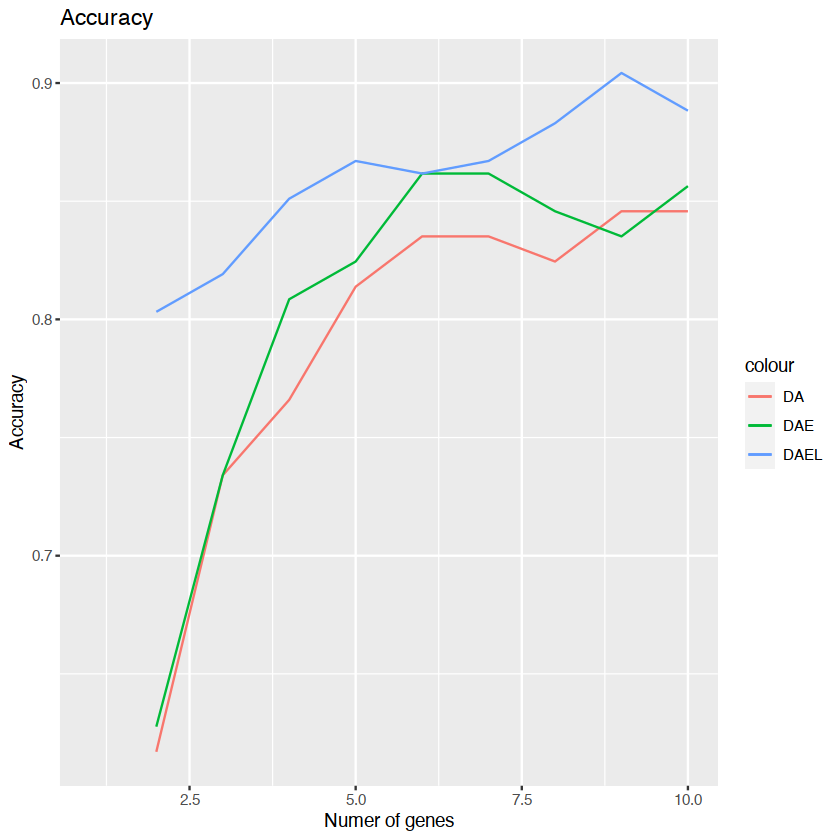

In [30]:
# Plot obtained accuracy
library(ggplot2)
data <- data.frame('da'=test.results.da$accVector,'daRed'=test.results.daRed$accVector,
                   'daLod'=test.results.daLOD$accVector,'ngenes'=seq(1,length(test.results.da$accVector)))
ggplot(data = data,x=ngenes) +
geom_line(aes(x=ngenes,y=da,colour = 'DA')) +
geom_line(aes(x=ngenes,y=daRed,colour = 'DAE')) +
geom_line(aes(x=ngenes,y=daLod,colour = 'DAEL')) +
labs (y = 'Accuracy',x='Numer of genes') + ggtitle ('Accuracy')

# References

    1. Carvalho-Silva, D., Pierleoni, A., Pignatelli, M., Ong, C., Fumis, L., Karamanis, N., ... & Miranda, A. (2019). Open Targets Platform: new developments and updates two years on. Nucleic acids research, 47(D1), D1056-D1065.
    2. Koscielny, G., An, P., Carvalho-Silva, D., Cham, J. A., Fumis, L., Gasparyan, R., ... & Pierleoni, A. (2017). Open Targets: a platform for therapeutic target identification and validation. Nucleic acids research, 45(D1), D985-D994.
    3. Nyholt, D. R. (2000). All LODs are not created equal. The American Journal of Human Genetics, 67(2), 282-288.
    4. Ritchie, M. E., Phipson, B., Wu, D. I., Hu, Y., Law, C. W., Shi, W., & Smyth, G. K. (2015). limma powers differential expression analyses for RNA-sequencing and microarray studies. Nucleic acids research, 43(7), e47-e47
    5. Koller, D., & Sahami, M. (1996). Toward optimal feature selection. Stanford InfoLab.
    6. Ding, C., & Peng, H. (2005). Minimum redundancy feature selection from microarray gene expression data. Journal of bioinformatics and computational biology, 3(02), 185-205.
    7. Gu, J. L., Lu, Y., Liu, C., & Lu, H. (2014). Multiclass classification of sarcomas using pathway based feature selection method. Journal of theoretical biology, 362, 3-8.
    8. Lu, H., Chen, J., Yan, K., Jin, Q., Xue, Y., & Gao, Z. (2017). A hybrid feature selection algorithm for gene expression data classification. Neurocomputing, 256, 56-62.